# Explore Data Analysis

In [2]:
# Libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# load the data
current_dir = os.getcwd()
csv_path = os.path.join(current_dir, "..", "data", "Retail_Transactions_Dataset.csv")
data_frame = pd.read_csv(csv_path)

In [4]:
# Data frame aspects: a fast view
## columns info
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB
None


In [5]:
## descriptive statistics
print(data_frame.describe())

       Transaction_ID     Total_Items      Total_Cost
count    1.000000e+06  1000000.000000  1000000.000000
mean     1.000500e+09        5.495941       52.455220
std      2.886753e+05        2.871654       27.416989
min      1.000000e+09        1.000000        5.000000
25%      1.000250e+09        3.000000       28.710000
50%      1.000500e+09        5.000000       52.420000
75%      1.000750e+09        8.000000       76.190000
max      1.001000e+09       10.000000      100.000000


In [6]:
## replacing the nulls values in promotion with "no promotion"
print(data_frame.isnull().sum())
data_frame['Promotion']=data_frame['Promotion'].fillna('No promotion')
print("nulls in promotion after replace: ",data_frame['Promotion'].isnull().sum())

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64
nulls in promotion after replace:  0


In [7]:
## Transforming Date column in date format
data_frame['Date'] = pd.to_datetime(data_frame['Date'], format="%Y-%m-%d %H:%M:%S")

In [8]:
## dropping null values
data_frame = data_frame.dropna()

In [9]:
#  Explory Data Analysis (EDA)
## Total Amount and Cost Mean
total_amount = data_frame['Total_Cost'].sum()
mean_cost = data_frame['Total_Cost'].mean()

print('Total amount: ',total_amount)
print('Amount mean: ',mean_cost)

Total amount:  52455220.39999998
Amount mean:  52.45522039999998


In [10]:
## Transaction by city
transaction_by_city = data_frame.groupby('City')['Total_Cost'].sum()
print(transaction_by_city)

City
Atlanta          5202731.84
Boston           5263307.96
Chicago          5263187.45
Dallas           5277111.53
Houston          5247054.78
Los Angeles      5232393.19
Miami            5240498.44
New York         5252469.92
San Francisco    5241099.86
Seattle          5235365.43
Name: Total_Cost, dtype: float64


In [11]:
## store type ordered by most amount
transaction_by_store_type = data_frame.groupby('Store_Type')['Total_Cost'].sum().sort_values(ascending=False)
print(transaction_by_store_type) 

Store_Type
Pharmacy             8766679.01
Supermarket          8763455.21
Warehouse Club       8760029.03
Convenience Store    8731901.36
Department Store     8731555.57
Specialty Store      8701600.22
Name: Total_Cost, dtype: float64


In [12]:
## monthly trend
montly_sales = data_frame.groupby(data_frame['Date'].dt.to_period('M'))['Total_Cost'].sum()
print(montly_sales)

Date
2020-01    1023565.45
2020-02     953488.19
2020-03    1015781.37
2020-04     988549.87
2020-05    1001696.33
2020-06     988630.18
2020-07    1012661.97
2020-08    1022764.43
2020-09     989218.28
2020-10    1008214.78
2020-11     998095.24
2020-12    1012884.46
2021-01    1019424.75
2021-02     914130.51
2021-03    1021530.14
2021-04     977534.57
2021-05    1011122.43
2021-06     991433.74
2021-07    1021536.65
2021-08    1010434.45
2021-09     971126.82
2021-10    1023812.22
2021-11     992148.55
2021-12    1014676.09
2022-01    1019373.51
2022-02     910431.32
2022-03    1016946.28
2022-04     988888.00
2022-05    1020629.00
2022-06     996858.89
2022-07    1016872.19
2022-08    1006269.54
2022-09     977087.51
2022-10    1008172.01
2022-11     983624.09
2022-12    1001880.56
2023-01    1008107.16
2023-02     926532.97
2023-03    1033556.59
2023-04     978488.79
2023-05    1014930.61
2023-06     965819.82
2023-07    1029246.18
2023-08    1015234.15
2023-09     985031.04
2023-

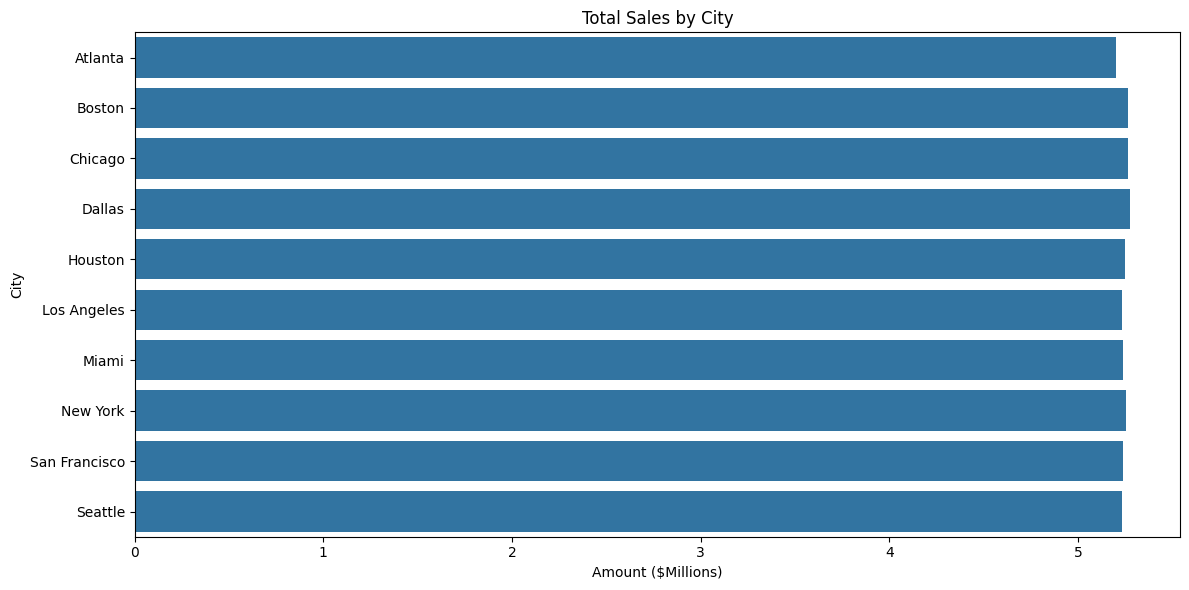

In [21]:
# Visualization
## Sales by City
plt.figure(figsize=(12,6))
sns.barplot(y=transaction_by_city.index,x=transaction_by_city.values/1e6)
plt.title('Total Sales by City')
plt.ylabel('City')
plt.xlabel('Amount ($Millions)')
plt.tight_layout()
plt.show()

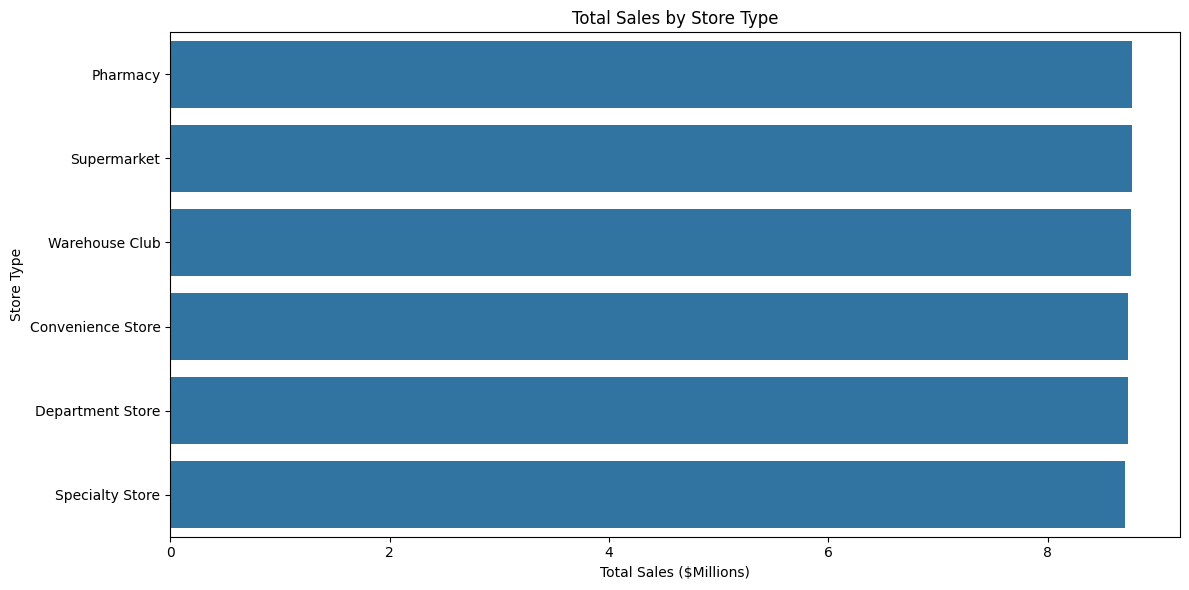

In [25]:
## Sales by store type
plt.figure(figsize=(12,6))
sns.barplot(y=transaction_by_store_type.index,x=transaction_by_store_type.values/1e6)
plt.title('Total Sales by Store Type')
plt.ylabel('Store Type')
plt.xlabel('Total Sales ($Millions)')
plt.tight_layout()
plt.show()

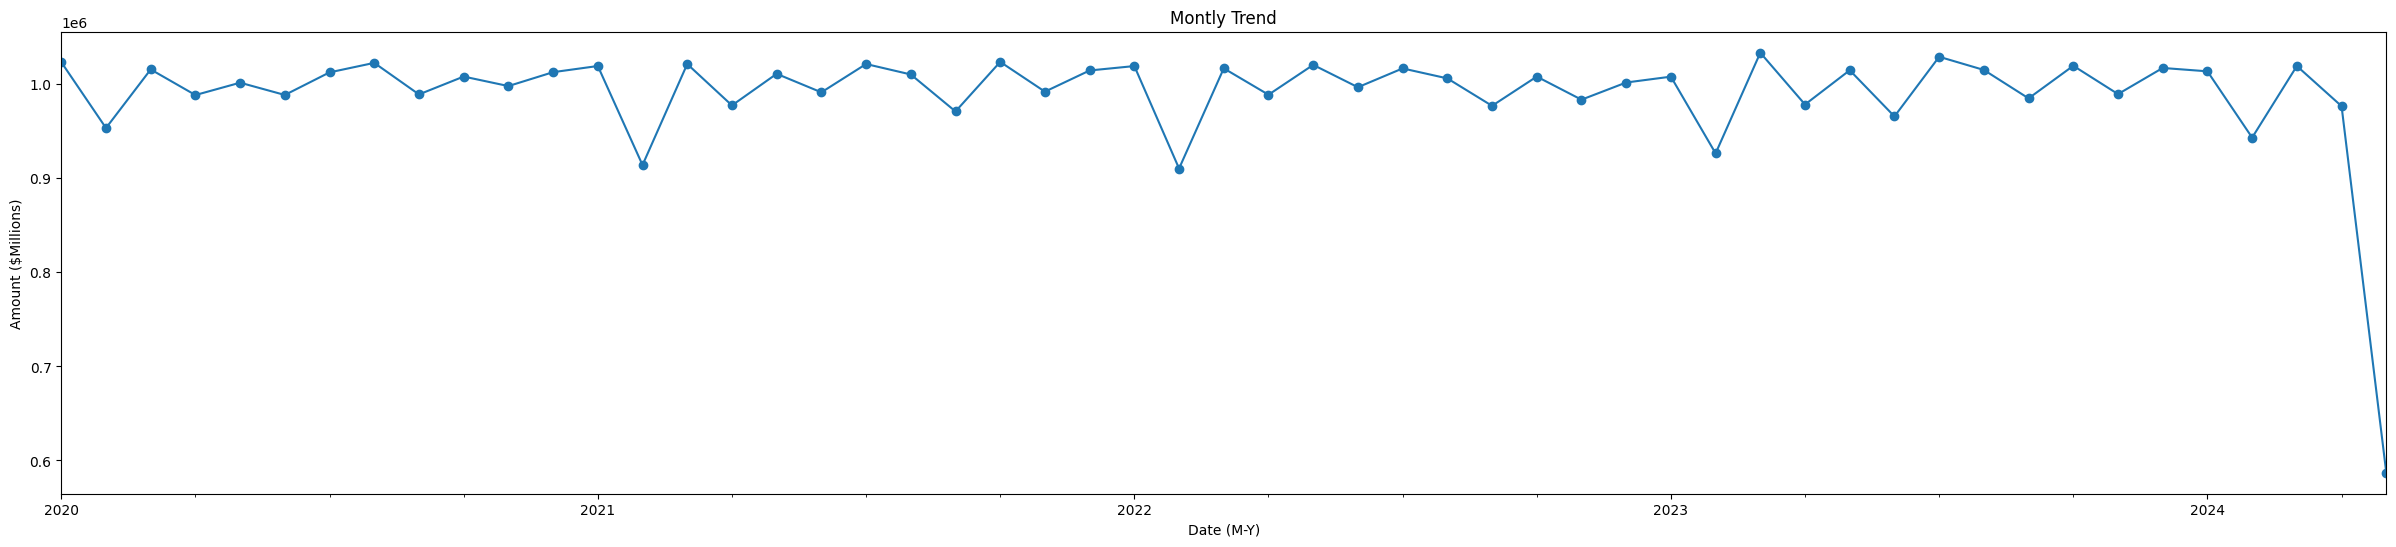

In [28]:
## Montly Trend
montly_sales.plot(kind='line',marker='o',figsize=(30,6))
plt.title('Montly Trend')
plt.xlabel('Date (M-Y)')
plt.ylabel('Amount ($Millions)')
plt.show()

## Insights
- Dalas is the city which has the biggest total amount
- Pharmacy is the store type which has the biggest total amount
- In each January the sales get down in comparison with other months
